# Import Packages & Load Data Files

In [1]:
# importing pandas and numpy for data related operations
import pandas as pd
import numpy as np

# importing matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns 
sns.set(color_codes=True)

# importing packages for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# importing packages to build and test the model  
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# importing model packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

# importing packages for stacking
from mlxtend.regressor import StackingCVRegressor

In [2]:
# importing required data files - given training and test_data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TeamAssn/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TeamAssn/test.csv')

# Exploratory Data Analysis (EDA)

In [23]:
# checking first few rows of the training data
train_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [24]:
# finding the shape of training and test data files
print(train_data.shape)
print(test_data.shape)

(137, 43)
(100000, 42)


In [25]:
# understanding data types and null value counts for all columns of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [26]:
# understanding important statistical parameters for the data 
train_data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [29]:
# checking if any columns in the train and test data have null values
print(train_data.isna().sum()[train_data.isna().sum()!= 0])
print(test_data.isna().sum()[test_data.isna().sum()!= 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [51]:
# understanding the correlation between target variable and predictors
abs(train_data.corr()['revenue']).sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P29        0.114846
P13        0.105085
P21        0.097411
P11        0.084247
P8         0.084215
P22        0.083562
P10        0.073220
P34        0.072343
P1         0.070217
P17        0.067137
P30        0.066203
P32        0.065857
P12        0.062193
P7         0.051165
P36        0.050534
P9         0.050352
P35        0.050156
P23        0.045507
P31        0.040418
P16        0.037997
P25        0.036365
P4         0.035685
P18        0.034537
P33        0.032426
P5         0.028191
P19        0.027984
P3         0.024613
P37        0.019051
P24        0.014222
P20        0.014147
P27        0.013680
P26        0.007650
P14        0.006441
Id         0.006277
P15        0.000742
Name: revenue, dtype: float64

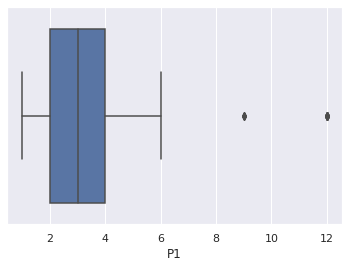

In [32]:
# box plot for column P1
sns.boxplot(x=train_data["P1"]);

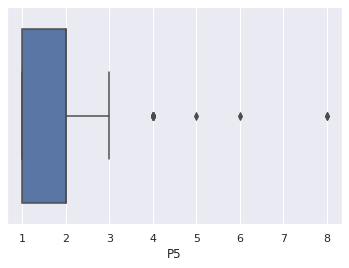

In [33]:
# box plot for column P5
sns.boxplot(x=train_data["P5"]);

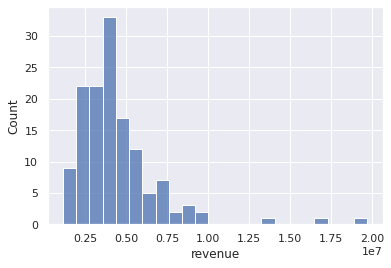

In [36]:
# box plot for column revenue
sns.histplot(data=train_data, x="revenue");

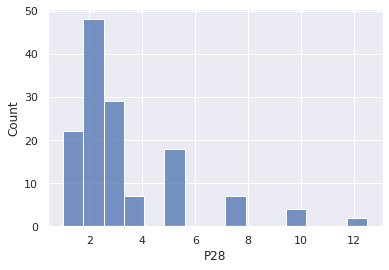

In [43]:
# box plot for column P28
sns.histplot(data=train_data, x="P28");

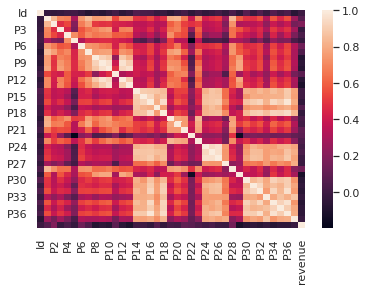

In [45]:
# heat map to indicate correlation
sns.heatmap(train_data.corr());

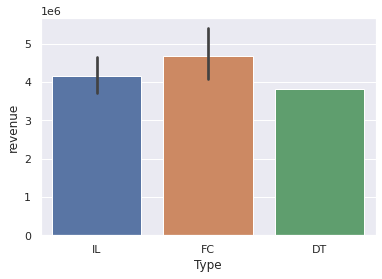

In [47]:
# bar plot between Type and Revenue
sns.barplot(x="Type", y="revenue", data=train_data);

# Preprocessing

In [3]:
# listing all categorical and numerical columns 
cat_cols = ['City Group', 'Type']
num_cols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
            'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
            'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28',
            'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']
target_col = ['revenue']

In [4]:
# making a copy of train data and removing unwanted columns
df = train_data.copy()
df.drop(['Id', 'Open Date', 'City'], inplace=True, axis=1)

# splitting training data into set of predictors and target variable
X = df.iloc[:, :-1]
y = df.revenue.copy()

# performing imputation to tackle missing values for categorical columns
cat_imputer = SimpleImputer(strategy ='most_frequent')
cat_imputer = cat_imputer.fit(X[cat_cols]) 
X[cat_cols] = cat_imputer.transform(X[cat_cols])

# performing imputation to tackle missing values for numerical columns
num_imputer = SimpleImputer(strategy ='mean')
num_imputer = num_imputer.fit(X[num_cols]) 
X[num_cols] = num_imputer.transform(X[num_cols])

# encoding categorical columns to create dummy variables
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X['Type_MB'] = 0

# clipping outliers
X[num_cols] = X[num_cols].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))

# normalizing the dataset
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [7]:
# splitting given dataset into training and test data (test data created here is used for model validation and asessment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Individual Models

In [8]:
# model with default parameters
reg = DecisionTreeRegressor(random_state=0)

# training the model on split data, and predicting outcomes for validation set 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse
print('RMSE - Default Model:', mean_squared_error(y_test, y_pred, squared=False))

# hyperparameter tuning the regressor
params = {"criterion": ["mse", 'friedman_mse'],
          "splitter": ['best', 'random'], 
          "min_weight_fraction_leaf": [0.01, 0.05, 0.1]}

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator = reg, param_distributions = params, cv = 3, scoring = "neg_root_mean_squared_error")

# Fit RandomizedSearchCV
grid.fit(X_train, y_train)

# Parameters and corresponding scores for random search
print("Best Score: ", grid.best_score_)
print("Best Parameters:", grid.best_params_)

# Rebuilding the model with obtained parameters
reg = DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, criterion='friedman_mse', random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse for final model
print('RMSE - Tuned Model:', mean_squared_error(y_test, y_pred, squared=False))

RMSE - Default Model: 3404146.954168327
Best Score:  -2345328.3616909925
Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'criterion': 'friedman_mse'}
RMSE - Tuned Model: 3537986.103315851


In [9]:
# model with default parameters
reg = RandomForestRegressor(random_state=0)

# training the model on split data, and predicting outcomes for validation set 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse
print('RMSE - Default Model:', mean_squared_error(y_test, y_pred, squared=False))

# hyperparameter tuning the regressor
params = {"criterion": ["mse"],
          "min_weight_fraction_leaf": [0.01, 0.05, 0.1],
          "n_estimators": [100, 200, 300]}

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator = reg, param_distributions = params, cv = 3, scoring = "neg_root_mean_squared_error")

# Fit RandomizedSearchCV
grid.fit(X_train, y_train)

# Parameters and corresponding scores for random search
print("Best Score: ", grid.best_score_)
print("Best Parameters:", grid.best_params_)

# Rebuilding the model with obtained parameters
reg = RandomForestRegressor(n_estimators=100, min_weight_fraction_leaf=0.05, criterion='mse', random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse for final model
print('RMSE - Tuned Model:', mean_squared_error(y_test, y_pred, squared=False))

RMSE - Default Model: 3113472.4549005986


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Score:  -2352376.541117786
Best Parameters: {'n_estimators': 100, 'min_weight_fraction_leaf': 0.05, 'criterion': 'mse'}
RMSE - Tuned Model: 3175531.1131034787


In [10]:
# model with default parameters
reg = MLPRegressor(random_state=0)

# training the model on split data, and predicting outcomes for validation set 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse
print('RMSE - Default Model:', mean_squared_error(y_test, y_pred, squared=False))

# hyperparameter tuning the regressor
params = {"hidden_layer_sizes": [(100, ), (200, )],
          "activation": ['logistic', 'relu', 'tanh'], 
          "learning_rate": ['constant', 'adaptive']}

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator = reg, param_distributions = params, cv = 3, scoring = "neg_root_mean_squared_error")

# Fit RandomizedSearchCV
grid.fit(X_train, y_train)

# Parameters and corresponding scores for random search
print("Best Score: ", grid.best_score_)
print("Best Parameters:", grid.best_params_)

# Rebuilding the model with obtained parameters
reg = MLPRegressor(learning_rate='adaptive', hidden_layer_sizes=(200, ), activation='relu', random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse for final model
print('RMSE - Tuned Model:', mean_squared_error(y_test, y_pred, squared=False))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RMSE - Default Model: 5950411.574775258


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best Score:  -4879485.19441012
Best Parameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (200,), 'activation': 'relu'}
RMSE - Tuned Model: 5950359.743679128


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
# model with default parameters
reg = SVR()

# training the model on split data, and predicting outcomes for validation set 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# hyperparameter tuning the regressor
params = {"kernel": ["linear", "rbf", 'sigmoid'],
          "C": [0.5, 1, 1.5]}

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator = reg, param_distributions = params, cv = 3, scoring = "neg_root_mean_squared_error")

# Fit RandomizedSearchCV
grid.fit(X_train, y_train)

# Parameters and corresponding scores for random search
print("Best Score: ", grid.best_score_)
print("Best Parameters:", grid.best_params_)

# Rebuilding the model with obtained parameters
reg = SVR(kernel='linear', C=1.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse for final model
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

RMSE: 3461413.4865653166
Best Score:  -2337445.834222009
Best Parameters: {'kernel': 'linear', 'C': 1.5}
RMSE: 3461476.4410934015


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [12]:
# model with default parameters
reg = SGDRegressor(random_state=0)

# training the model on split data, and predicting outcomes for validation set 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# hyperparameter tuning the regressor
params = {"penalty": ["l1", "l2"],
          "loss": ['huber']}

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator = reg, param_distributions = params, cv = 3, scoring = "neg_root_mean_squared_error")

# Fit RandomizedSearchCV
grid.fit(X_train, y_train)

# Parameters and corresponding scores for random search
print("Best Score: ", grid.best_score_)
print("Best Parameters:", grid.best_params_)

# Rebuilding the model with obtained parameters
reg = SGDRegressor(penalty='l1', loss='huber', random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# generating rmse for final model
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

RMSE: 3259756.9991251137
Best Score:  -4879596.489377307
Best Parameters: {'penalty': 'l1', 'loss': 'huber'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


RMSE: 5950468.502483623


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# Stacking

In [52]:
# setting up the base layer for stacking

base_models = [
               DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, criterion='friedman_mse', random_state=0),
               RandomForestRegressor(n_estimators=100, min_weight_fraction_leaf=0.05, criterion='mse', random_state=0),
               MLPRegressor(learning_rate='adaptive', hidden_layer_sizes=(200, ), activation='relu', random_state=0, early_stopping=True),
               SVR(kernel='linear', C=1.5),
               SGDRegressor(penalty='l1', loss='huber', random_state=0)
]

# setting up the stacking regressor - variant 1 

meta_model1 = XGBRegressor()

sreg1 = StackingCVRegressor(base_models,
                           shuffle = False,
                           cv = 3,
                           meta_regressor = meta_model1)


# setting up the stacking regressor - variant 2

meta_model2 = SGDRegressor()

sreg2 = StackingCVRegressor(base_models,
                           shuffle = False,
                           cv = 3,
                           meta_regressor = meta_model2)

In [61]:
# training the stacked model - variant 1 
sreg1.fit(X_train.values, y_train.values)
y_pred1 = sreg1.predict(X_test)

# generating rmse
print('Stacked Model - Variant 1')
print('RMSE:', mean_squared_error(y_test, y_pred1, squared=False))

# training the stacked model - variant 2
sreg2.fit(X_train.values, y_train.values)
y_pred2 = sreg2.predict(X_test)

# generating rmse
print('Stacked Model - Variant 2')
print('RMSE:', mean_squared_error(y_test, y_pred2, squared=False))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Stacked Model - Variant 1
RMSE: 3444645.876121449


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Stacked Model - Variant 2
RMSE: 1.7752498151932912e+22


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [55]:
# hyperparameter tuning the stacked regressor - variant 1
params = {"meta_regressor__n_estimators": [100, 200, 300],
          "meta_regressor__booster": ['gbtree', 'gblinear', 'dart'],  
          "meta_regressor__learning_rate": [0.05, 0.01, 0.1]}

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator = sreg1, param_distributions = params, cv = 3, scoring = "neg_root_mean_squared_error", verbose = 2)

# Fit RandomizedSearchCV
grid.fit(X_train.values, y_train.values)

# Parameters and corresponding scores for random search
print("Best Score: ", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=dart 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=dart, total=   1.0s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=dart 
[19:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=dart, total=   1.0s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=dart 
[19:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=dart, total=   1.0s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=gbtree 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=gbtree 
[19:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=gbtree 
[19:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gbtree 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gbtree 
[19:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gbtree 
[19:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=gblinear 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=gblinear, total=   1.0s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=gblinear 
[19:33:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=gblinear, total=   1.0s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=gblinear 
[19:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.05, meta_regressor__booster=gblinear, total=   0.9s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.1, meta_regressor__booster=dart 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.1, meta_regressor__booster=dart, total=   1.1s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.1, meta_regressor__booster=dart 
[19:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.1, meta_regressor__booster=dart, total=   1.1s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.1, meta_regressor__booster=dart 
[19:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.1, meta_regressor__booster=dart, total=   1.1s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear, total=   1.0s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear 
[19:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear, total=   1.0s
[CV] meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear 
[19:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=100, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear, total=   1.0s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart, total=   1.1s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart 
[19:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart, total=   1.1s
[CV] meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart 
[19:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=300, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear 
[19:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear, total=   0.9s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear 
[19:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.1, meta_regressor__booster=gblinear, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart, total=   1.1s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart 
[19:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart 
[19:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.01, meta_regressor__booster=dart, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.05, meta_regressor__booster=gbtree 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.05, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.05, meta_regressor__booster=gbtree 
[19:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.05, meta_regressor__booster=gbtree, total=   1.0s
[CV] meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.05, meta_regressor__booster=gbtree 
[19:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  meta_regressor__n_estimators=200, meta_regressor__learning_rate=0.05, meta_regressor__booster=gbtree, total=   1.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   30.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score:  -2286037.232217267
Best Parameters: {'meta_regressor__n_estimators': 100, 'meta_regressor__learning_rate': 0.05, 'meta_regressor__booster': 'gblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [56]:
# hyperparameter tuning the stacked regressor - variant 2
params = {"meta_regressor__max_iter": [1000, 2000, 3000, 5000],
          "meta_regressor__penalty": ['l2', 'l1', 'elasticnet'],  
          "meta_regressor__learning_rate": ['invscaling', 'constant', 'optimal', 'adaptive']}

# Initialize RandomizedSearchCV
grid = RandomizedSearchCV(estimator = sreg2, param_distributions = params, cv = 3, scoring = "neg_root_mean_squared_error", verbose = 2)

# Fit RandomizedSearchCV
grid.fit(X_train.values, y_train.values)

# Parameters and corresponding scores for random search
print("Best Score: ", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=constant 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=constant, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=constant 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=constant, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=constant 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=constant, total=   0.9s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=optimal 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=1000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l1, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=l1, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l1, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l1, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l1, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l1, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=2000, meta_regressor__learning_rate=optimal 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=2000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=2000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=2000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=l2, meta_regressor__max_iter=2000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=l2, meta_regressor__max_iter=2000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=invscaling 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=invscaling, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=invscaling 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=invscaling, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=invscaling 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=invscaling, total=   0.9s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=adaptive 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=adaptive, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=adaptive 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=adaptive, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=adaptive 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=3000, meta_regressor__learning_rate=adaptive, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=optimal, total=   0.9s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=adaptive 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=adaptive, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=adaptive 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=adaptive, total=   1.0s
[CV] meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=adaptive 
[CV]  meta_regressor__penalty=elasticnet, meta_regressor__max_iter=5000, meta_regressor__learning_rate=adaptive, total=   0.9s
[CV] meta_regressor__penalty=l1, meta_regressor__max_iter=3000, meta_regressor__learning_rate=constant 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  meta_regressor__penalty=l1, meta_regressor__max_iter=3000, meta_regressor__learning_rate=constant, total=   1.0s
[CV] meta_regressor__penalty=l1, meta_regressor__max_iter=3000, meta_regressor__learning_rate=constant 
[CV]  meta_regressor__penalty=l1, meta_regressor__max_iter=3000, meta_regressor__learning_rate=constant, total=   1.0s
[CV] meta_regressor__penalty=l1, meta_regressor__max_iter=3000, meta_regressor__learning_rate=constant 
[CV]  meta_regressor__penalty=l1, meta_regressor__max_iter=3000, meta_regressor__learning_rate=constant, total=   1.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   29.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best Score:  -1.5081945148013156e+19
Best Parameters: {'meta_regressor__penalty': 'elasticnet', 'meta_regressor__max_iter': 5000, 'meta_regressor__learning_rate': 'adaptive'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [58]:
base_models = [
               DecisionTreeRegressor(splitter='best', min_weight_fraction_leaf=0.1, criterion='friedman_mse', random_state=0),
               RandomForestRegressor(n_estimators=100, min_weight_fraction_leaf=0.05, criterion='mse', random_state=0),
               MLPRegressor(learning_rate='adaptive', hidden_layer_sizes=(200, ), activation='relu', random_state=0, early_stopping=True),
               SVR(kernel='linear', C=1.5),
               SGDRegressor(penalty='l1', loss='huber', random_state=0)
]

# final stacked model - variant 1 

meta_model3 = XGBRegressor(n_estimators=100, learning_rate=0.05, booster='gblinear')

sreg3 = StackingCVRegressor(base_models,
                           shuffle = False,
                           cv = 3,
                           meta_regressor = meta_model3)


# final stacked model - variant 2

meta_model4 = SGDRegressor(penalty='elasticnet', max_iter=5000, learning_rate='adaptive')

sreg4 = StackingCVRegressor(base_models,
                           shuffle = False,
                           cv = 3,
                           meta_regressor = meta_model4)

In [60]:
# training the final stacked model - variant 1 
sreg3.fit(X_train.values, y_train.values)
y_pred3 = sreg3.predict(X_test)

# generating rmse
print('Stacked Model - Variant 1')
print('RMSE:', mean_squared_error(y_test, y_pred3, squared=False))

# training the final stacked model - variant 2
sreg4.fit(X_train.values, y_train.values)
y_pred4 = sreg4.predict(X_test)

# generating rmse
print('Stacked Model - Variant 2')
print('RMSE:', mean_squared_error(y_test, y_pred4, squared=False))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[19:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Stacked Model - Variant 1
RMSE: 3334509.4471968007


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Stacked Model - Variant 2
RMSE: 2.8758910980933786e+18


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# Test Data

In [18]:
# creating copy of test file and removing unwanted from test data

df2 = test_data.copy()
id_col = df2.Id.copy()
df2.drop(['Id', 'Open Date', 'City'], inplace=True, axis=1)

In [19]:
# preprocessing test data

df2[cat_cols] = cat_imputer.transform(df2[cat_cols])

df2[num_cols] = num_imputer.transform(df2[num_cols])

df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)

df2[num_cols] = df2[num_cols].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))

df2[num_cols] = scaler.fit_transform(df2[num_cols])

In [20]:
# generating predictions using base stacked model
y_pred = sreg1.predict(df2.values)

# generating submission dataset with QuoteNumber and QuoteConversion_Flag columns
submit_df = pd.Series(y_pred, name='Prediction')
submission = pd.concat([id_col, submit_df], axis=1)
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/TeamAssn/submit_sreg1.csv', index=False)

In [21]:
# generating predictions using tuned stacked model
y_pred = sreg3.predict(df2.values)

# generating submission dataset with QuoteNumber and QuoteConversion_Flag columns
submit_df = pd.Series(y_pred, name='Prediction')
submission = pd.concat([id_col, submit_df], axis=1)
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/TeamAssn/submit_sreg3.csv', index=False)

In [22]:
# generating predictions using best performing individual model
reg = RandomForestRegressor(n_estimators=100, min_weight_fraction_leaf=0.05, criterion='mse', random_state=0)
reg.fit(X, y)

y_pred = reg.predict(df2.values)

# generating submission dataset with QuoteNumber and QuoteConversion_Flag columns
submit_df = pd.Series(y_pred, name='Prediction')
submission = pd.concat([id_col, submit_df], axis=1)
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/TeamAssn/submit_reg.csv', index=False)